In [1]:
%matplotlib notebook
import os
import math
from collections import deque
import numpy as np
import pandas as pd
import seaborn as sns
import calendar

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
# from bokeh.charts import TimeSeries, show

from scipy import stats

In [21]:
train_df = pd.read_csv("../input/train_1.csv")

In [22]:
page_details = pd.DataFrame([i.split("_")[-3:] for i in train_df["Page"]])
page_details.columns = ["project", "access", "agent"]

train_df = page_details.merge(train_df, how="inner", left_index=True, right_index=True)
enWiki_df = train_df.groupby('project').get_group('en.wikipedia.org').groupby('agent').get_group('all-agents')

# project_columns = page_details['project'].unique()
# access_columns = page_details['access'].unique()
# agents_columns = page_details['agent'].unique()


In [28]:
import pickle
def load_obj(name ):
    with open('./../obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
bestWeeklySine = load_obj("sineall")

Page Name:  10_Gigabit_Ethernet_en.wikipedia.org_desktop_all-agents
Min: 264.0 Max: 2660.0
Power to be raised: 0.29198


<IPython.core.display.Javascript object>


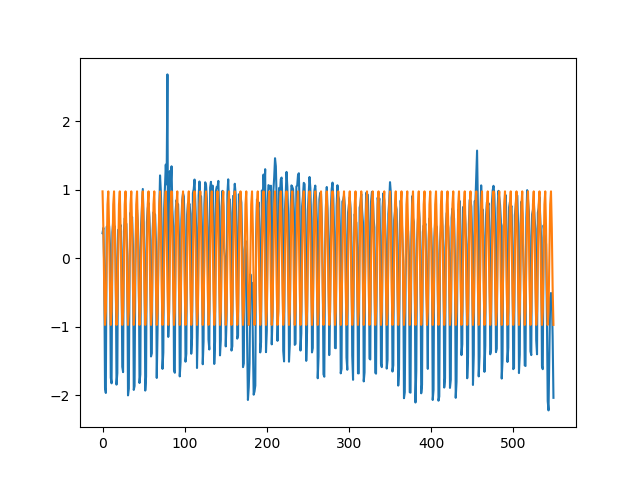

7.31706966491


In [89]:
pageNo = 6
print 'Page Name: ', enWiki_df.iloc[pageNo,3]

def findIndex(name):
    count,__ = train_df.shape
    for i in range(count):
        if train_df.iloc[i,3] == name:
            return i
        
num = findIndex(enWiki_df.iloc[pageNo,3])

signal = np.matrix(train_df.iloc[num,4:].values)

u = signal[:]

_, length = signal.shape
siglen = length 

minimum, maximum = signal.min(), signal.max()
RESCALED_MAX = 10
ROUND = 5
powerRaise = round( math.log(RESCALED_MAX, max(train_df.iloc[num,4:].values)), ROUND)

print "Min:",minimum , "Max:", maximum
print "Power to be raised:", powerRaise

EXPECTED_MIN =2
shift =0 
mean = 0
if minimum <= EXPECTED_MIN:
    shift = EXPECTED_MIN

def inputmapping(x):
    temp = np.power(x.astype(float)+shift,powerRaise)
    global mean
    mean = np.mean(temp)
    return temp - mean

def invinputmapping(y):
    return np.power(y+mean, 1/powerRaise) - shift

def sine(period, length):
    x = np.array(length)
    y = np.sin(2 * np.pi * x / period)
    return y


u = inputmapping(u.astype(float))

startIndex = bestWeeklySine[num][0]                                 # gives the starting point for sine wave with highest correlation to input signal
u = np.vstack((u,sine(7,range(startIndex, startIndex + siglen))))

plt.plot(np.array(u)[0,:])
plt.plot(np.array(u)[1,:])
print mean

In [68]:
pr = math.log(5,100)
val = math.pow( math.pow(100, pr), 1/pr)
print math.pow(2, pr), pr, val

1.27410572951 0.349485002168 100.0


In [19]:
a = np.matrix([[1,2],[3,4]])
print a
np.reshape(a[:,1],(1,2))

[[1 2]
 [3 4]]


matrix([[2, 4]])

<IPython.core.display.Javascript object>


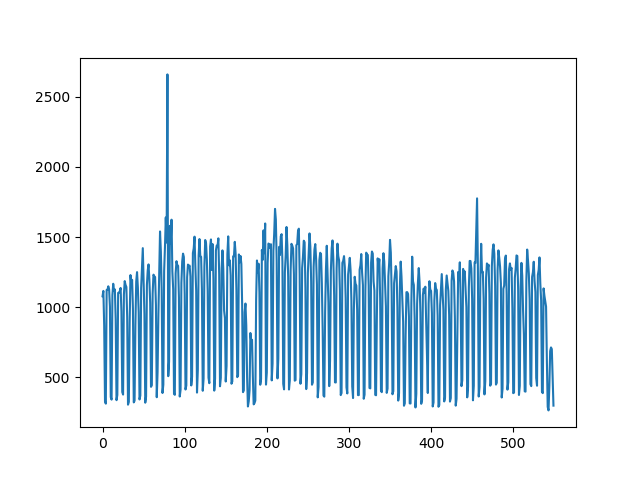

In [95]:
# plt.plot(signal.T)
plt.plot(invinputmapping(inputmapping(signal.T)))
# plt.plot(np.array(u)[0,:])
# plt.plot(np.array(u)[1,:])

In [24]:
sig_no = 5    # Test signal no
minimum, maximum = min(train_df.iloc[sig_no,4:].values), max(train_df.iloc[sig_no,4:].values)
print "Min:",minimum , "Max:", maximum
powerRaise = round( math.log(4, max(train_df.iloc[sig_no,4:].values)), 5)
print "Power to be raised:", powerRaise
EXPECTED_MIN =2
shift =0 
if minimum <= EXPECTED_MIN:
    shift = EXPECTED_MIN

Min: 1.0 Max: 213.0
Power to be raised: 0.25857


<IPython.core.display.Javascript object>


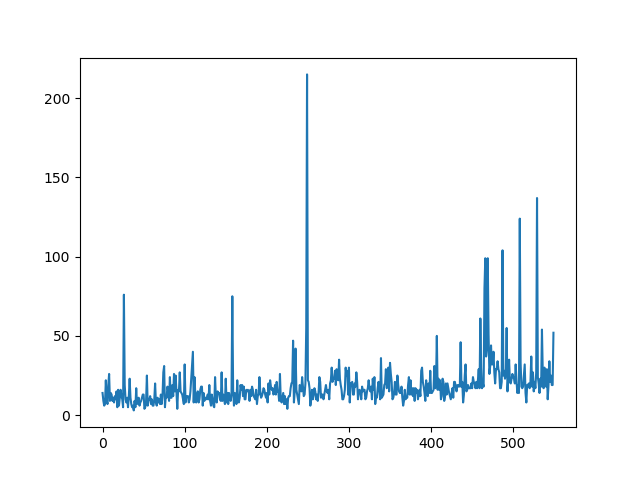

In [29]:
#Plot of raw data
plt.plot(train_df.iloc[sig_no,4:].values+shift)

<IPython.core.display.Javascript object>


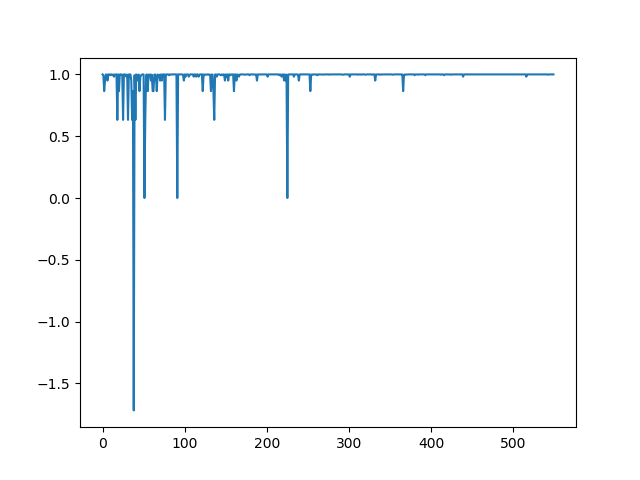

In [30]:
# data Scaling: 1 - e^ (-1*data)
plt.plot(1-np.exp(-1*train_df.iloc[sig_no,4:].values.astype(float)+shift))

<IPython.core.display.Javascript object>


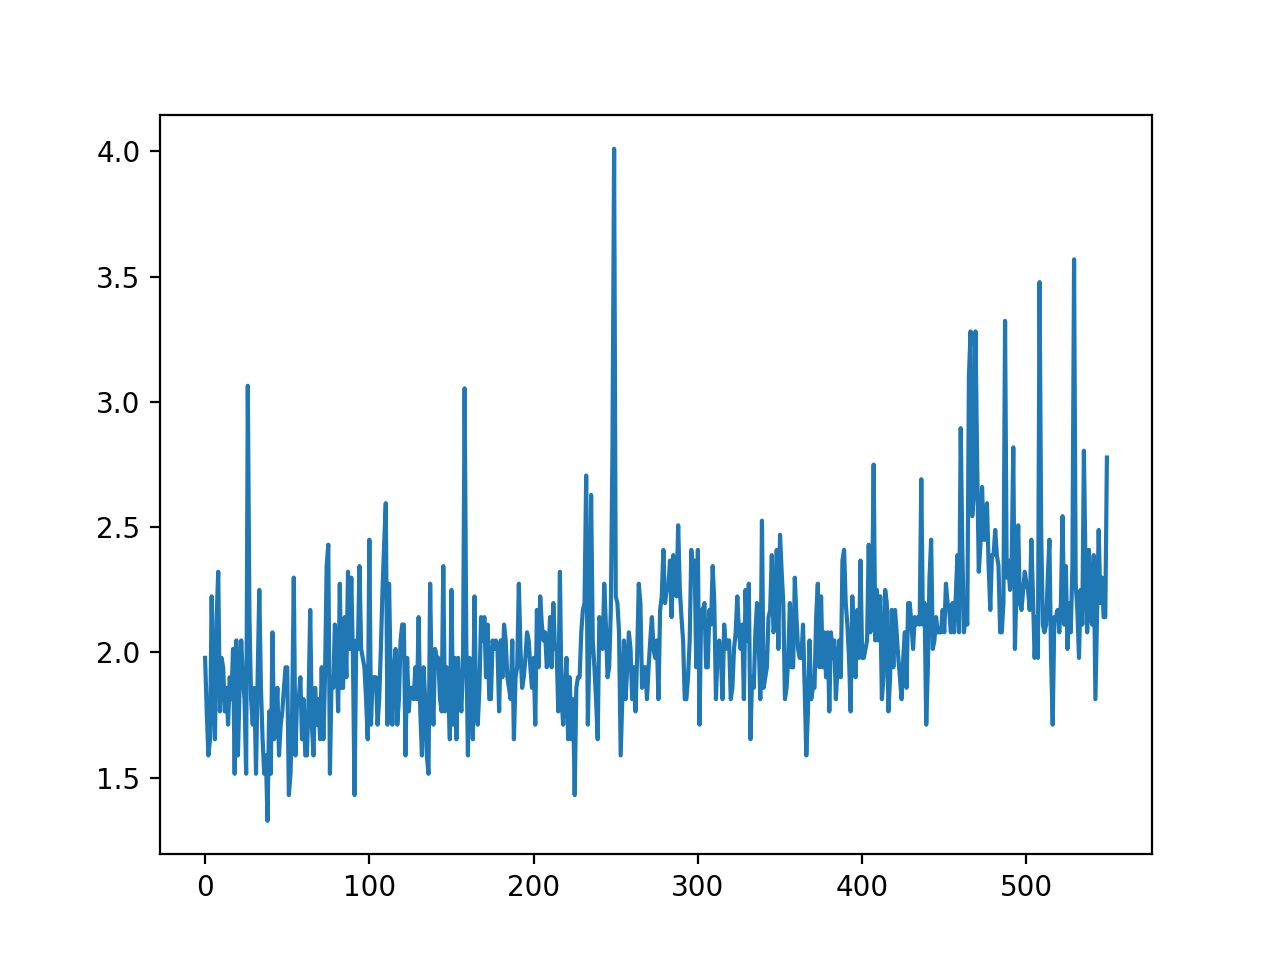

In [7]:
# Data Scaling:  data ^ powerRaise
plt.plot((np.power(train_df.iloc[sig_no,4:].values.astype(float)+shift,powerRaise)))

<IPython.core.display.Javascript object>


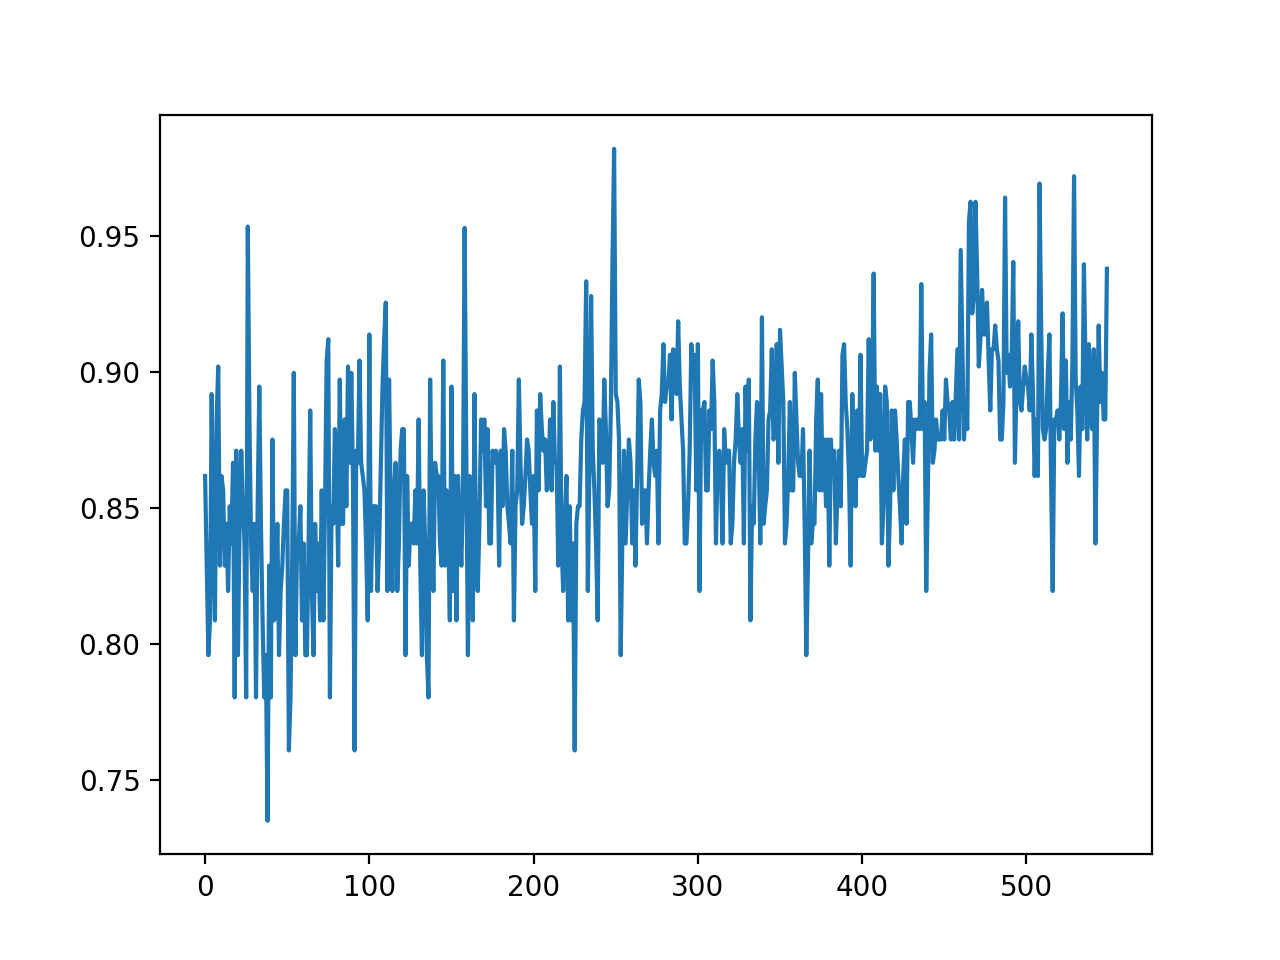

In [8]:
# Data Rescaling:  1 - e ^ ( -1* data ^ powerRaise )
plt.plot(1- np.exp(-1*np.power(train_df.iloc[sig_no,4:].values.astype(float)+shift,powerRaise)))

In [352]:
"""Graph of Exponential function"""
# plt.plot( 1-np.exp(-1*np.arange(10)) )

'Graph of Exponential function'

In [13]:
import math
math.log(5)

1.6094379124341003

[  0.   -0.2  -0.4  -0.6  -0.8  -1.   -1.2  -1.4  -1.6  -1.8  -2.   -2.2
  -2.4  -2.6  -2.8  -3.   -3.2  -3.4  -3.6  -3.8  -4.   -4.2  -4.4  -4.6
  -4.8  -5.   -5.2  -5.4  -5.6  -5.8  -6.   -6.2  -6.4  -6.6  -6.8  -7.
  -7.2  -7.4  -7.6  -7.8  -8.   -8.2  -8.4  -8.6  -8.8  -9.   -9.2  -9.4
  -9.6  -9.8 -10.  -10.2 -10.4 -10.6 -10.8 -11.  -11.2 -11.4 -11.6 -11.8
 -12.  -12.2 -12.4 -12.6 -12.8 -13.  -13.2 -13.4 -13.6 -13.8 -14.  -14.2
 -14.4 -14.6 -14.8 -15.  -15.2 -15.4 -15.6 -15.8 -16.  -16.2 -16.4 -16.6
 -16.8 -17.  -17.2 -17.4 -17.6 -17.8 -18.  -18.2 -18.4 -18.6 -18.8 -19.
 -19.2 -19.4 -19.6 -19.8]


<IPython.core.display.Javascript object>


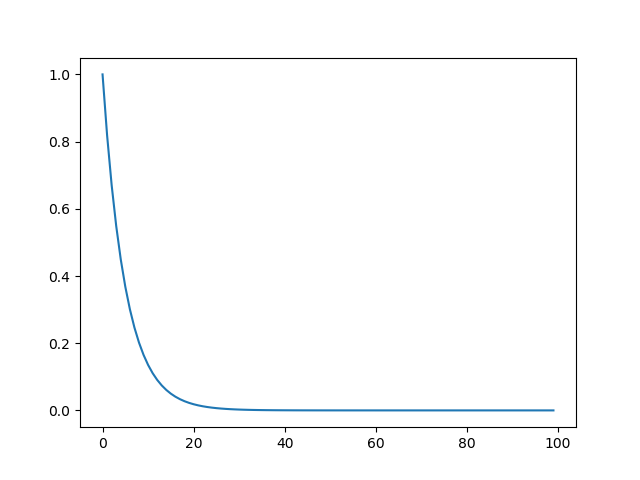

In [33]:
a = -np.arange(100)/5.0
print a
np.exp(a/1.0)
plt.plot(np.exp(a/1.0))